# Stock Analysis in Python

# Stock Data Quality Report

Data Quality Report Contents
Contents

Task 1 & 2: Load Data and Perform Initial Exploration - loading datasets, as well as displaying the first few rows, getting the number of rows, listing all columns, listing the data types for each column.

: Further Inspecting of the Datasets - Creaiting list of values throuhg value.count for all string columns in the trees data set, then got the descriptive statistics for the set, and listing its data types. Then found out if floats are really floats or ints with nulls. Same operations have been performed on the environmental data set. Only unique values have been counted for the common names data set, due to no numeric values in it.

Task 3: Identify Missing Values - This task consists mainly of performing mathematical operations to find missing values in all three data set.

Task 4: Identify Outliers in the Dimensions - Here, the main objective in this task is to find the crazy outliers 

Task 5: Identify Duplicates in the  Dataset - The main objective of this task was to find out, if there wre any duplicated rows based on the identifier column.

Task 6: Identify Unmatched Data - the main objective of this task is to identify unmatched data for all three data frames.

In [627]:
# importing all libraries 

import matplotlib.pyplot as mplt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from scipy.stats import zscore

# 1.0 General Data Quality Checks

In [628]:
# Creating a Pandas dataframe called trees that contains the contents of the Excel file through pd.read function
stocks = pd.read_csv("MAANG_stocks.csv")
print(stocks)

            Date  Adj Close AAPL  Close AAPL   High AAPL    Low AAPL  \
0     23/10/2024      230.759995  230.759995  235.139999  227.759995   
1     22/10/2024      235.860001  235.860001  236.220001  232.600006   
2     21/10/2024      236.479996  236.479996  236.850006  234.449997   
3     18/10/2024      235.000000  235.000000  236.179993  234.009995   
4     17/10/2024      232.149994  232.149994  233.850006  230.520004   
...          ...             ...         ...         ...         ...   
1458  08/01/2019       36.036121   37.687500   37.955002   37.130001   
1459  07/01/2019       35.362007   36.982498   37.207500   36.474998   
1460  04/01/2019       35.440903   37.064999   37.137501   35.950001   
1461  03/01/2019       33.989891   35.547501   36.430000   35.500000   
1462  02/01/2019       37.750080   39.480000   39.712502   38.557499   

       Open AAPL  Volume AAPL  Adj Close GOOGL  Close GOOGL  High GOOGL  ...  \
0     234.080002     52037200       162.779999   162.77

In [629]:
stocks.head()

,Date,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,Adj Close GOOGL,Close GOOGL,High GOOGL,...,High TSLA,Low TSLA,Open TSLA,Volume TSLA,Adj Close NVDA,Close NVDA,High NVDA,Low NVDA,Open NVDA,Volume NVDA
0,23/10/2024,230.759995,230.759995,235.139999,227.759995,234.080002,52037200,162.779999,162.779999,165.820007,...,218.720001,212.110001,217.130005,77867400,139.559998,139.559998,142.429993,137.460007,142.029999,284973100
1,22/10/2024,235.860001,235.860001,236.220001,232.600006,233.889999,38846600,165.139999,165.139999,165.770004,...,218.220001,215.259995,217.309998,43268700,143.589996,143.589996,144.419998,141.779999,142.910004,226311600
2,21/10/2024,236.479996,236.479996,236.850006,234.449997,234.449997,36254500,164.070007,164.070007,164.500000,...,220.479996,215.729996,218.899994,47329000,143.710007,143.710007,143.710007,138.000000,138.130005,264554500
3,18/10/2024,235.000000,235.000000,236.179993,234.009995,236.179993,46431500,163.419998,163.419998,164.710007,...,222.279999,219.229996,220.710007,49611900,138.000000,138.000000,138.899994,137.279999,138.669998,176090200
4,17/10/2024,232.149994,232.149994,233.850006,230.520004,233.429993,32993800,162.929993,162.929993,166.369995,...,222.080002,217.899994,221.589996,50791800,136.929993,136.929993,140.889999,136.869995,139.339996,306435900


In [630]:
stocks.shape

(1463, 43)

In [631]:
stocks.columns

Index(['Date', 'Adj Close AAPL', 'Close AAPL', 'High AAPL', 'Low AAPL',
       'Open AAPL', 'Volume AAPL', 'Adj Close GOOGL', 'Close GOOGL',
       'High GOOGL', 'Low GOOGL', 'Open GOOGL', 'Volume GOOGL',
       'Adj Close MSFT', 'Close MSFT', 'High MSFT', 'Low MSFT', 'Open MSFT',
       'Volume MSFT', 'Adj Close AMZN', 'Close AMZN', 'High AMZN', 'Low AMZN',
       'Open AMZN', 'Volume AMZN', 'Adj Close META', 'Close META', 'High META',
       'Low META', 'Open META', 'Volume META', 'Adj Close TSLA', 'Close TSLA',
       'High TSLA', 'Low TSLA', 'Open TSLA', 'Volume TSLA', 'Adj Close NVDA',
       'Close NVDA', 'High NVDA', 'Low NVDA', 'Open NVDA', 'Volume NVDA'],
      dtype='object')

In [632]:
stocks['Date'].value_counts()

23/10/2024    1
24/11/2020    1
27/11/2020    1
30/11/2020    1
01/12/2020    1
             ..
15/11/2022    1
16/11/2022    1
17/11/2022    1
18/11/2022    1
02/01/2019    1
Name: Date, Length: 1463, dtype: int64

In [633]:
stocks.dtypes

Date                object
Adj Close AAPL     float64
Close AAPL         float64
High AAPL          float64
Low AAPL           float64
Open AAPL          float64
Volume AAPL          int64
Adj Close GOOGL    float64
Close GOOGL        float64
High GOOGL         float64
Low GOOGL          float64
Open GOOGL         float64
Volume GOOGL         int64
Adj Close MSFT     float64
Close MSFT         float64
High MSFT          float64
Low MSFT           float64
Open MSFT          float64
Volume MSFT          int64
Adj Close AMZN     float64
Close AMZN         float64
High AMZN          float64
Low AMZN           float64
Open AMZN          float64
Volume AMZN          int64
Adj Close META     float64
Close META         float64
High META          float64
Low META           float64
Open META          float64
Volume META          int64
Adj Close TSLA     float64
Close TSLA         float64
High TSLA          float64
Low TSLA           float64
Open TSLA          float64
Volume TSLA          int64
A

In [634]:
stocks.describe().round(1)

,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,Adj Close GOOGL,Close GOOGL,High GOOGL,Low GOOGL,...,High TSLA,Low TSLA,Open TSLA,Volume TSLA,Adj Close NVDA,Close NVDA,High NVDA,Low NVDA,Open NVDA,Volume NVDA
count,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,...,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1.463000e+03
mean,132.1,133.8,135.2,132.3,133.7,95744477.6,106.7,106.9,108.0,105.7,...,179.2,171.2,175.3,128410194.8,29.3,29.3,29.9,28.7,29.3,4.561525e+08
std,51.9,51.5,51.9,51.0,51.5,52304377.3,35.3,35.4,35.7,35.1,...,103.9,99.3,101.7,81296985.8,32.3,32.3,32.9,31.6,32.3,1.946041e+08
min,34.0,35.5,36.4,35.5,36.0,24048300.0,51.1,51.3,52.5,50.4,...,12.4,11.8,12.1,29401800.0,3.2,3.2,3.4,3.2,3.3,9.788400e+07
25%,85.5,87.7,88.3,86.2,87.6,60804200.0,72.7,72.9,73.6,72.3,...,66.7,63.4,65.6,78576450.0,9.1,9.2,9.3,8.9,9.2,3.210878e+08
50%,142.5,144.5,146.3,142.6,144.0,83241600.0,107.1,107.3,108.2,105.2,...,203.2,194.1,199.3,104654200.0,16.9,17.0,17.3,16.6,16.9,4.268050e+08
75%,171.0,172.6,173.8,170.8,172.2,113594800.0,135.7,136.1,137.2,134.6,...,251.8,241.8,246.8,150034400.0,31.6,31.7,32.4,30.9,31.9,5.515060e+08
max,236.5,236.5,237.5,234.4,236.5,426510000.0,190.9,191.2,191.8,189.0,...,414.5,405.7,411.5,914082000.0,143.7,143.7,144.4,141.8,142.9,2.511528e+09


In [635]:
# Checking the datatype of the Number of trees column
stocks['Adj Close AAPL'].dtypes

dtype('float64')

In [636]:
stocks['Close GOOGL'].dtypes

dtype('float64')

In [637]:
stocks['Low NVDA'].dtypes

dtype('float64')

In [638]:
# Checking if there are float values in columns, we can see that these are integer values in this column.
stocks['Adj Close AAPL'].unique()

array([230.7599945 , 235.8600006 , 236.4799957 , ...,  35.44090271,
        33.98989105,  37.75008011])

In [639]:
stocks['Close GOOGL'].unique()

array([162.7799988 , 165.1399994 , 164.0700073 , ...,  53.9034996 ,
        51.27349854,  52.73400116])

In [640]:
stocks['Low NVDA'].unique()

array([137.4600067 , 141.7799988 , 138.        , ...,   3.24250007,
         3.19225001,   3.25125003])

# 2.0 Further Inspection of the Datasets

In [641]:
# Creating a list of values in Site Name column and their counts through the value_counts function
stocks['Low NVDA'].value_counts()

12.10500    2
17.99000    2
4.17550     2
15.38900    2
21.92700    2
           ..
15.92200    1
16.38200    1
15.87300    1
15.53500    1
3.25125     1
Name: Low NVDA, Length: 1446, dtype: int64

In [642]:
stocks['Close GOOGL'].value_counts()

105.970001    3
162.779999    2
131.399994    2
130.250000    2
134.990005    2
             ..
96.559998     1
100.769997    1
99.629997     1
101.129997    1
52.734001     1
Name: Close GOOGL, Length: 1438, dtype: int64

In [643]:
stocks['Adj Close AAPL'].value_counts()

168.875214    2
139.913269    2
174.944794    2
143.027084    2
166.552933    2
             ..
148.305130    1
146.898361    1
148.641953    1
147.403595    1
37.750080     1
Name: Adj Close AAPL, Length: 1449, dtype: int64

# Descriptive Stats for Numeric Type Columns

Applied the describe() function to obtain the descriptive statistics for the numeric columns. For each column, use the data type as a guide to classify it as discrete or continuous. However, verify whether any float columns are truly floats or just integers with null values by using the pandas.Series.unique() function.

In [644]:
# Getting the descriptive statistics for the numeric columns through the describe function for more clarity.


stocks.describe().round(0)

,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,Adj Close GOOGL,Close GOOGL,High GOOGL,Low GOOGL,...,High TSLA,Low TSLA,Open TSLA,Volume TSLA,Adj Close NVDA,Close NVDA,High NVDA,Low NVDA,Open NVDA,Volume NVDA
count,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,...,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1463.0,1.463000e+03
mean,132.0,134.0,135.0,132.0,134.0,95744478.0,107.0,107.0,108.0,106.0,...,179.0,171.0,175.0,128410195.0,29.0,29.0,30.0,29.0,29.0,4.561525e+08
std,52.0,51.0,52.0,51.0,51.0,52304377.0,35.0,35.0,36.0,35.0,...,104.0,99.0,102.0,81296986.0,32.0,32.0,33.0,32.0,32.0,1.946041e+08
min,34.0,36.0,36.0,36.0,36.0,24048300.0,51.0,51.0,52.0,50.0,...,12.0,12.0,12.0,29401800.0,3.0,3.0,3.0,3.0,3.0,9.788400e+07
25%,86.0,88.0,88.0,86.0,88.0,60804200.0,73.0,73.0,74.0,72.0,...,67.0,63.0,66.0,78576450.0,9.0,9.0,9.0,9.0,9.0,3.210878e+08
50%,143.0,144.0,146.0,143.0,144.0,83241600.0,107.0,107.0,108.0,105.0,...,203.0,194.0,199.0,104654200.0,17.0,17.0,17.0,17.0,17.0,4.268050e+08
75%,171.0,173.0,174.0,171.0,172.0,113594800.0,136.0,136.0,137.0,135.0,...,252.0,242.0,247.0,150034400.0,32.0,32.0,32.0,31.0,32.0,5.515060e+08
max,236.0,236.0,237.0,234.0,236.0,426510000.0,191.0,191.0,192.0,189.0,...,414.0,406.0,411.0,914082000.0,144.0,144.0,144.0,142.0,143.0,2.511528e+09


In [645]:
# Checking the data types using the .dtypes method for clarity.
stocks.dtypes

Date                object
Adj Close AAPL     float64
Close AAPL         float64
High AAPL          float64
Low AAPL           float64
Open AAPL          float64
Volume AAPL          int64
Adj Close GOOGL    float64
Close GOOGL        float64
High GOOGL         float64
Low GOOGL          float64
Open GOOGL         float64
Volume GOOGL         int64
Adj Close MSFT     float64
Close MSFT         float64
High MSFT          float64
Low MSFT           float64
Open MSFT          float64
Volume MSFT          int64
Adj Close AMZN     float64
Close AMZN         float64
High AMZN          float64
Low AMZN           float64
Open AMZN          float64
Volume AMZN          int64
Adj Close META     float64
Close META         float64
High META          float64
Low META           float64
Open META          float64
Volume META          int64
Adj Close TSLA     float64
Close TSLA         float64
High TSLA          float64
Low TSLA           float64
Open TSLA          float64
Volume TSLA          int64
A

- In the cells here it has been found out that there are no integers and only floating values
- Through the use of the .select_dtypes(include=[float/int]) function
- and counting the values in the columns in the end 

In [646]:
result = stocks.select_dtypes(include=[int])
print(result)

      Volume AAPL  Volume GOOGL  Volume MSFT  Volume AMZN  Volume META  \
0        52037200      18152900     19592400     31733200     14185600   
1        38846600      16568100     25482200     29650600      8544500   
2        36254500      20946500     14206100     24639400      8171900   
3        46431500      19757700     17145300     37417700      7694300   
4        32993800      21453400     14820000     25039400      8701200   
...           ...           ...          ...          ...          ...   
1458    164101200      35414000     31514400    177628000     26263800   
1459    219111200      47446000     35656100    159864000     20089300   
1460    234428400      46022000     44060600    183652000     29002100   
1461    365248800      41960000     42579100    139512000     22717900   
1462    148158800      31868000     35329300    159662000     28146200   

      Volume TSLA  Volume NVDA  
0        77867400    284973100  
1        43268700    226311600  
2        473

In [647]:
stocks.count()

Date               1463
Adj Close AAPL     1463
Close AAPL         1463
High AAPL          1463
Low AAPL           1463
Open AAPL          1463
Volume AAPL        1463
Adj Close GOOGL    1463
Close GOOGL        1463
High GOOGL         1463
Low GOOGL          1463
Open GOOGL         1463
Volume GOOGL       1463
Adj Close MSFT     1463
Close MSFT         1463
High MSFT          1463
Low MSFT           1463
Open MSFT          1463
Volume MSFT        1463
Adj Close AMZN     1463
Close AMZN         1463
High AMZN          1463
Low AMZN           1463
Open AMZN          1463
Volume AMZN        1463
Adj Close META     1463
Close META         1463
High META          1463
Low META           1463
Open META          1463
Volume META        1463
Adj Close TSLA     1463
Close TSLA         1463
High TSLA          1463
Low TSLA           1463
Open TSLA          1463
Volume TSLA        1463
Adj Close NVDA     1463
Close NVDA         1463
High NVDA          1463
Low NVDA           1463
Open NVDA       

In [648]:
# Checking The Data Types: Before filtering, checking the data types of the DataFrame:

print(stocks.dtypes)

Date                object
Adj Close AAPL     float64
Close AAPL         float64
High AAPL          float64
Low AAPL           float64
Open AAPL          float64
Volume AAPL          int64
Adj Close GOOGL    float64
Close GOOGL        float64
High GOOGL         float64
Low GOOGL          float64
Open GOOGL         float64
Volume GOOGL         int64
Adj Close MSFT     float64
Close MSFT         float64
High MSFT          float64
Low MSFT           float64
Open MSFT          float64
Volume MSFT          int64
Adj Close AMZN     float64
Close AMZN         float64
High AMZN          float64
Low AMZN           float64
Open AMZN          float64
Volume AMZN          int64
Adj Close META     float64
Close META         float64
High META          float64
Low META           float64
Open META          float64
Volume META          int64
Adj Close TSLA     float64
Close TSLA         float64
High TSLA          float64
Low TSLA           float64
Open TSLA          float64
Volume TSLA          int64
A

In [649]:
result = stocks.select_dtypes(include=[float])
print(result)

      Adj Close AAPL  Close AAPL   High AAPL    Low AAPL   Open AAPL  \
0         230.759995  230.759995  235.139999  227.759995  234.080002   
1         235.860001  235.860001  236.220001  232.600006  233.889999   
2         236.479996  236.479996  236.850006  234.449997  234.449997   
3         235.000000  235.000000  236.179993  234.009995  236.179993   
4         232.149994  232.149994  233.850006  230.520004  233.429993   
...              ...         ...         ...         ...         ...   
1458       36.036121   37.687500   37.955002   37.130001   37.389999   
1459       35.362007   36.982498   37.207500   36.474998   37.174999   
1460       35.440903   37.064999   37.137501   35.950001   36.132500   
1461       33.989891   35.547501   36.430000   35.500000   35.994999   
1462       37.750080   39.480000   39.712502   38.557499   38.722500   

      Adj Close GOOGL  Close GOOGL  High GOOGL   Low GOOGL  Open GOOGL  ...  \
0          162.779999   162.779999  165.820007  161.9299

In [650]:
# Selecting Float Columns

result = stocks.select_dtypes(include=[float])
print(result)

      Adj Close AAPL  Close AAPL   High AAPL    Low AAPL   Open AAPL  \
0         230.759995  230.759995  235.139999  227.759995  234.080002   
1         235.860001  235.860001  236.220001  232.600006  233.889999   
2         236.479996  236.479996  236.850006  234.449997  234.449997   
3         235.000000  235.000000  236.179993  234.009995  236.179993   
4         232.149994  232.149994  233.850006  230.520004  233.429993   
...              ...         ...         ...         ...         ...   
1458       36.036121   37.687500   37.955002   37.130001   37.389999   
1459       35.362007   36.982498   37.207500   36.474998   37.174999   
1460       35.440903   37.064999   37.137501   35.950001   36.132500   
1461       33.989891   35.547501   36.430000   35.500000   35.994999   
1462       37.750080   39.480000   39.712502   38.557499   38.722500   

      Adj Close GOOGL  Close GOOGL  High GOOGL   Low GOOGL  Open GOOGL  ...  \
0          162.779999   162.779999  165.820007  161.9299

In [651]:
# Coverted the int columns to floating numbers for better data integrity

import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Volume AAPL': [52037200, 38846600, 36254500],
    'Volume GOOGL': [18152900, 16568100, 20946500],
    'Volume MSFT': [19592400, 25482200, 14206100],
    'Volume AMZN': [31733200, 29650600, 24639400],
    'Volume META': [14185600, 8544500, 8171900],
    'Volume TSLA': [77867400, 43268700, 47329000],
    'Volume NVDA': [284973100, 226311600, 264554500]
}

stocks = pd.DataFrame(data)

# Check the data types
print("Data Types:\n", stocks.dtypes)

# Convert to float if necessary
stocks = stocks.astype(float)

# Select float columns
result = stocks.select_dtypes(include=[float])
print("Float Columns:\n", result)

Data Types:
 Volume AAPL     int64
Volume GOOGL    int64
Volume MSFT     int64
Volume AMZN     int64
Volume META     int64
Volume TSLA     int64
Volume NVDA     int64
dtype: object
Float Columns:
    Volume AAPL  Volume GOOGL  Volume MSFT  Volume AMZN  Volume META  \
0   52037200.0    18152900.0   19592400.0   31733200.0   14185600.0   
1   38846600.0    16568100.0   25482200.0   29650600.0    8544500.0   
2   36254500.0    20946500.0   14206100.0   24639400.0    8171900.0   

   Volume TSLA  Volume NVDA  
0   77867400.0  284973100.0  
1   43268700.0  226311600.0  
2   47329000.0  264554500.0  


In [652]:
result = stocks.select_dtypes(include=[float])
print(result)

   Volume AAPL  Volume GOOGL  Volume MSFT  Volume AMZN  Volume META  \
0   52037200.0    18152900.0   19592400.0   31733200.0   14185600.0   
1   38846600.0    16568100.0   25482200.0   29650600.0    8544500.0   
2   36254500.0    20946500.0   14206100.0   24639400.0    8171900.0   

   Volume TSLA  Volume NVDA  
0   77867400.0  284973100.0  
1   43268700.0  226311600.0  
2   47329000.0  264554500.0  


In [653]:
stocks = pd.read_csv("MAANG_stocks.csv")
print(stocks)

            Date  Adj Close AAPL  Close AAPL   High AAPL    Low AAPL  \
0     23/10/2024      230.759995  230.759995  235.139999  227.759995   
1     22/10/2024      235.860001  235.860001  236.220001  232.600006   
2     21/10/2024      236.479996  236.479996  236.850006  234.449997   
3     18/10/2024      235.000000  235.000000  236.179993  234.009995   
4     17/10/2024      232.149994  232.149994  233.850006  230.520004   
...          ...             ...         ...         ...         ...   
1458  08/01/2019       36.036121   37.687500   37.955002   37.130001   
1459  07/01/2019       35.362007   36.982498   37.207500   36.474998   
1460  04/01/2019       35.440903   37.064999   37.137501   35.950001   
1461  03/01/2019       33.989891   35.547501   36.430000   35.500000   
1462  02/01/2019       37.750080   39.480000   39.712502   38.557499   

       Open AAPL  Volume AAPL  Adj Close GOOGL  Close GOOGL  High GOOGL  ...  \
0     234.080002     52037200       162.779999   162.77

In [654]:
# Removing all null values 

stocks.dropna()

,Date,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,Adj Close GOOGL,Close GOOGL,High GOOGL,...,High TSLA,Low TSLA,Open TSLA,Volume TSLA,Adj Close NVDA,Close NVDA,High NVDA,Low NVDA,Open NVDA,Volume NVDA
0,23/10/2024,230.759995,230.759995,235.139999,227.759995,234.080002,52037200,162.779999,162.779999,165.820007,...,218.720001,212.110001,217.130005,77867400,139.559998,139.559998,142.429993,137.460007,142.029999,284973100
1,22/10/2024,235.860001,235.860001,236.220001,232.600006,233.889999,38846600,165.139999,165.139999,165.770004,...,218.220001,215.259995,217.309998,43268700,143.589996,143.589996,144.419998,141.779999,142.910004,226311600
2,21/10/2024,236.479996,236.479996,236.850006,234.449997,234.449997,36254500,164.070007,164.070007,164.500000,...,220.479996,215.729996,218.899994,47329000,143.710007,143.710007,143.710007,138.000000,138.130005,264554500
3,18/10/2024,235.000000,235.000000,236.179993,234.009995,236.179993,46431500,163.419998,163.419998,164.710007,...,222.279999,219.229996,220.710007,49611900,138.000000,138.000000,138.899994,137.279999,138.669998,176090200
4,17/10/2024,232.149994,232.149994,233.850006,230.520004,233.429993,32993800,162.929993,162.929993,166.369995,...,222.080002,217.899994,221.589996,50791800,136.929993,136.929993,140.889999,136.869995,139.339996,306435900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,08/01/2019,36.036121,37.687500,37.955002,37.130001,37.389999,164101200,54.134457,54.268501,54.667500,...,22.934000,21.801332,22.797333,105127500,3.467853,3.495750,3.669500,3.422500,3.667250,786016000
1459,07/01/2019,35.362007,36.982498,37.207500,36.474998,37.174999,219111200,53.663124,53.796001,54.134998,...,22.449333,21.183332,21.448000,113268000,3.556390,3.585000,3.622250,3.410750,3.462500,709160000
1460,04/01/2019,35.440903,37.064999,37.137501,35.950001,36.132500,234428400,53.770355,53.903500,54.000000,...,21.200001,20.181999,20.400000,110911500,3.377580,3.404750,3.443250,3.242500,3.273500,585620000
1461,03/01/2019,33.989891,35.547501,36.430000,35.500000,35.994999,365248800,51.146851,51.273499,53.313000,...,20.626667,19.825333,20.466667,104478000,3.174214,3.199750,3.379000,3.192250,3.344750,705552000


In [655]:
stocks.count()

Date               1463
Adj Close AAPL     1463
Close AAPL         1463
High AAPL          1463
Low AAPL           1463
Open AAPL          1463
Volume AAPL        1463
Adj Close GOOGL    1463
Close GOOGL        1463
High GOOGL         1463
Low GOOGL          1463
Open GOOGL         1463
Volume GOOGL       1463
Adj Close MSFT     1463
Close MSFT         1463
High MSFT          1463
Low MSFT           1463
Open MSFT          1463
Volume MSFT        1463
Adj Close AMZN     1463
Close AMZN         1463
High AMZN          1463
Low AMZN           1463
Open AMZN          1463
Volume AMZN        1463
Adj Close META     1463
Close META         1463
High META          1463
Low META           1463
Open META          1463
Volume META        1463
Adj Close TSLA     1463
Close TSLA         1463
High TSLA          1463
Low TSLA           1463
Open TSLA          1463
Volume TSLA        1463
Adj Close NVDA     1463
Close NVDA         1463
High NVDA          1463
Low NVDA           1463
Open NVDA       

# 3. Identifying missing values

In [656]:
# Finding the percentage of null values through Pandas isnull() and mean() methods.
stocks.isnull().mean()*100

Date               0.0
Adj Close AAPL     0.0
Close AAPL         0.0
High AAPL          0.0
Low AAPL           0.0
Open AAPL          0.0
Volume AAPL        0.0
Adj Close GOOGL    0.0
Close GOOGL        0.0
High GOOGL         0.0
Low GOOGL          0.0
Open GOOGL         0.0
Volume GOOGL       0.0
Adj Close MSFT     0.0
Close MSFT         0.0
High MSFT          0.0
Low MSFT           0.0
Open MSFT          0.0
Volume MSFT        0.0
Adj Close AMZN     0.0
Close AMZN         0.0
High AMZN          0.0
Low AMZN           0.0
Open AMZN          0.0
Volume AMZN        0.0
Adj Close META     0.0
Close META         0.0
High META          0.0
Low META           0.0
Open META          0.0
Volume META        0.0
Adj Close TSLA     0.0
Close TSLA         0.0
High TSLA          0.0
Low TSLA           0.0
Open TSLA          0.0
Volume TSLA        0.0
Adj Close NVDA     0.0
Close NVDA         0.0
High NVDA          0.0
Low NVDA           0.0
Open NVDA          0.0
Volume NVDA        0.0
dtype: floa

In [657]:
# Finding the number of null values through the utilisation of isnull() and sum() functions.
stocks.isnull().sum()

Date               0
Adj Close AAPL     0
Close AAPL         0
High AAPL          0
Low AAPL           0
Open AAPL          0
Volume AAPL        0
Adj Close GOOGL    0
Close GOOGL        0
High GOOGL         0
Low GOOGL          0
Open GOOGL         0
Volume GOOGL       0
Adj Close MSFT     0
Close MSFT         0
High MSFT          0
Low MSFT           0
Open MSFT          0
Volume MSFT        0
Adj Close AMZN     0
Close AMZN         0
High AMZN          0
Low AMZN           0
Open AMZN          0
Volume AMZN        0
Adj Close META     0
Close META         0
High META          0
Low META           0
Open META          0
Volume META        0
Adj Close TSLA     0
Close TSLA         0
High TSLA          0
Low TSLA           0
Open TSLA          0
Volume TSLA        0
Adj Close NVDA     0
Close NVDA         0
High NVDA          0
Low NVDA           0
Open NVDA          0
Volume NVDA        0
dtype: int64

In [658]:
# Using the isin and sum() functions to find the number of zero values in the trees data set


stocks.isin([0]).mean()*100

Date               0.0
Adj Close AAPL     0.0
Close AAPL         0.0
High AAPL          0.0
Low AAPL           0.0
Open AAPL          0.0
Volume AAPL        0.0
Adj Close GOOGL    0.0
Close GOOGL        0.0
High GOOGL         0.0
Low GOOGL          0.0
Open GOOGL         0.0
Volume GOOGL       0.0
Adj Close MSFT     0.0
Close MSFT         0.0
High MSFT          0.0
Low MSFT           0.0
Open MSFT          0.0
Volume MSFT        0.0
Adj Close AMZN     0.0
Close AMZN         0.0
High AMZN          0.0
Low AMZN           0.0
Open AMZN          0.0
Volume AMZN        0.0
Adj Close META     0.0
Close META         0.0
High META          0.0
Low META           0.0
Open META          0.0
Volume META        0.0
Adj Close TSLA     0.0
Close TSLA         0.0
High TSLA          0.0
Low TSLA           0.0
Open TSLA          0.0
Volume TSLA        0.0
Adj Close NVDA     0.0
Close NVDA         0.0
High NVDA          0.0
Low NVDA           0.0
Open NVDA          0.0
Volume NVDA        0.0
dtype: floa

In [659]:
# Finding the percentage of null and zero values through the use of the isnull, sum, isin functions 
# and the shape method, and also using the arithmetic operators.
(stocks.isnull().sum() + stocks.isin([0]).sum())/stocks.shape[0]

Date               0.0
Adj Close AAPL     0.0
Close AAPL         0.0
High AAPL          0.0
Low AAPL           0.0
Open AAPL          0.0
Volume AAPL        0.0
Adj Close GOOGL    0.0
Close GOOGL        0.0
High GOOGL         0.0
Low GOOGL          0.0
Open GOOGL         0.0
Volume GOOGL       0.0
Adj Close MSFT     0.0
Close MSFT         0.0
High MSFT          0.0
Low MSFT           0.0
Open MSFT          0.0
Volume MSFT        0.0
Adj Close AMZN     0.0
Close AMZN         0.0
High AMZN          0.0
Low AMZN           0.0
Open AMZN          0.0
Volume AMZN        0.0
Adj Close META     0.0
Close META         0.0
High META          0.0
Low META           0.0
Open META          0.0
Volume META        0.0
Adj Close TSLA     0.0
Close TSLA         0.0
High TSLA          0.0
Low TSLA           0.0
Open TSLA          0.0
Volume TSLA        0.0
Adj Close NVDA     0.0
Close NVDA         0.0
High NVDA          0.0
Low NVDA           0.0
Open NVDA          0.0
Volume NVDA        0.0
dtype: floa

In [660]:
# Finding the number of null and zero values utilizing the isnull, sum and isin functions 
# and also using the Pyhton arithmentic operators
(stocks.isnull().sum() + stocks.isin([0]).sum())

Date               0
Adj Close AAPL     0
Close AAPL         0
High AAPL          0
Low AAPL           0
Open AAPL          0
Volume AAPL        0
Adj Close GOOGL    0
Close GOOGL        0
High GOOGL         0
Low GOOGL          0
Open GOOGL         0
Volume GOOGL       0
Adj Close MSFT     0
Close MSFT         0
High MSFT          0
Low MSFT           0
Open MSFT          0
Volume MSFT        0
Adj Close AMZN     0
Close AMZN         0
High AMZN          0
Low AMZN           0
Open AMZN          0
Volume AMZN        0
Adj Close META     0
Close META         0
High META          0
Low META           0
Open META          0
Volume META        0
Adj Close TSLA     0
Close TSLA         0
High TSLA          0
Low TSLA           0
Open TSLA          0
Volume TSLA        0
Adj Close NVDA     0
Close NVDA         0
High NVDA          0
Low NVDA           0
Open NVDA          0
Volume NVDA        0
dtype: int64

In [661]:
#  Checking for percentage of missing values in each column 
pct_miss_values = stocks.isnull().sum() * 100 / len(stocks)
pct_miss_values

Date               0.0
Adj Close AAPL     0.0
Close AAPL         0.0
High AAPL          0.0
Low AAPL           0.0
Open AAPL          0.0
Volume AAPL        0.0
Adj Close GOOGL    0.0
Close GOOGL        0.0
High GOOGL         0.0
Low GOOGL          0.0
Open GOOGL         0.0
Volume GOOGL       0.0
Adj Close MSFT     0.0
Close MSFT         0.0
High MSFT          0.0
Low MSFT           0.0
Open MSFT          0.0
Volume MSFT        0.0
Adj Close AMZN     0.0
Close AMZN         0.0
High AMZN          0.0
Low AMZN           0.0
Open AMZN          0.0
Volume AMZN        0.0
Adj Close META     0.0
Close META         0.0
High META          0.0
Low META           0.0
Open META          0.0
Volume META        0.0
Adj Close TSLA     0.0
Close TSLA         0.0
High TSLA          0.0
Low TSLA           0.0
Open TSLA          0.0
Volume TSLA        0.0
Adj Close NVDA     0.0
Close NVDA         0.0
High NVDA          0.0
Low NVDA           0.0
Open NVDA          0.0
Volume NVDA        0.0
dtype: floa

- So far the data set is with an amazing quality. 
- Apart of couple int columns here an there there is almost no discrepancies 

# 4.0 Finding the outliers in the Stocks Dataset

In [662]:
# Geting the descriptive stats for the numeric columns, as well as 'round()'-ing them to 1 point after the decimal.
stocks.describe().round(2)

,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,Adj Close GOOGL,Close GOOGL,High GOOGL,Low GOOGL,...,High TSLA,Low TSLA,Open TSLA,Volume TSLA,Adj Close NVDA,Close NVDA,High NVDA,Low NVDA,Open NVDA,Volume NVDA
count,1463.00,1463.00,1463.00,1463.00,1463.00,1.463000e+03,1463.00,1463.00,1463.00,1463.00,...,1463.00,1463.00,1463.00,1.463000e+03,1463.00,1463.00,1463.00,1463.00,1463.00,1.463000e+03
mean,132.15,133.84,135.20,132.34,133.72,9.574448e+07,106.66,106.91,108.04,105.72,...,179.22,171.17,175.33,1.284102e+08,29.32,29.34,29.89,28.74,29.33,4.561525e+08
std,51.87,51.47,51.89,51.02,51.46,5.230438e+07,35.33,35.39,35.73,35.09,...,103.89,99.28,101.73,8.129699e+07,32.30,32.30,32.93,31.60,32.32,1.946041e+08
min,33.99,35.55,36.43,35.50,35.99,2.404830e+07,51.15,51.27,52.50,50.44,...,12.45,11.80,12.07,2.940180e+07,3.17,3.20,3.38,3.19,3.27,9.788400e+07
25%,85.51,87.66,88.33,86.23,87.58,6.080420e+07,72.70,72.88,73.64,72.25,...,66.66,63.39,65.59,7.857645e+07,9.14,9.16,9.26,8.89,9.17,3.210878e+08
50%,142.51,144.50,146.33,142.65,143.97,8.324160e+07,107.07,107.34,108.18,105.16,...,203.20,194.14,199.30,1.046542e+08,16.93,16.95,17.26,16.57,16.90,4.268050e+08
75%,171.01,172.56,173.82,170.82,172.21,1.135948e+08,135.72,136.06,137.22,134.64,...,251.82,241.78,246.76,1.500344e+08,31.64,31.68,32.40,30.92,31.87,5.515060e+08
max,236.48,236.48,237.49,234.45,236.48,4.265100e+08,190.93,191.18,191.75,189.03,...,414.50,405.67,411.47,9.140820e+08,143.71,143.71,144.42,141.78,142.91,2.511528e+09


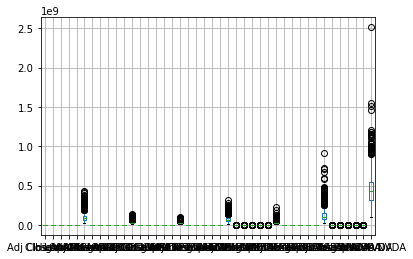

In [663]:
# checking for outliers

stocks.boxplot()
mplt.show()

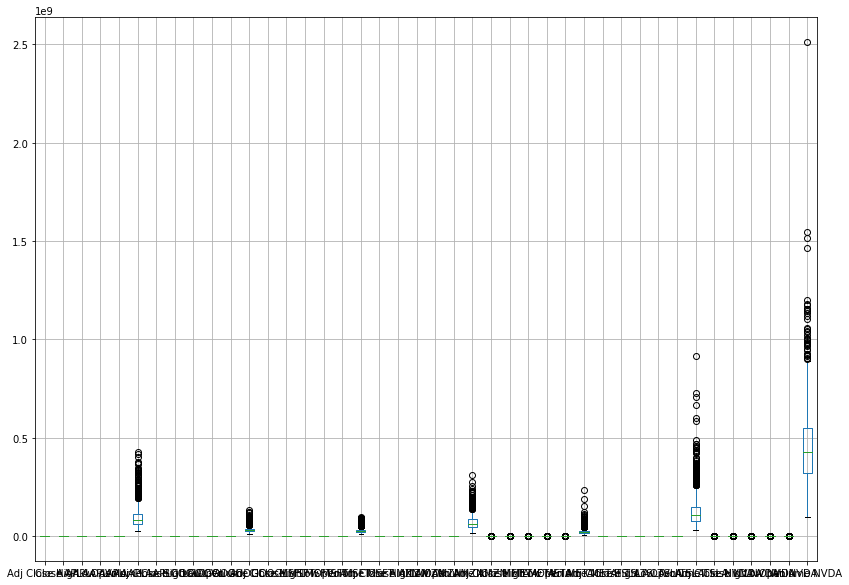

In [664]:
# Assuming 'stocks' is your DataFrame
fig, ax = mplt.subplots(figsize=(14, 10))  # Adjust these numbers to change the size
stocks.boxplot(ax=ax)
mplt.show()

In [665]:
#Using the Interquartile Range (IQR) method:

Q1 = stocks.quantile(0.25)
Q3 = stocks.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = stocks[(stocks < lower_bound) | (stocks > upper_bound)]



/var/folders/db/969qtqpd5tqcq7cgtpqtnyhh0000gn/T/ipykernel_4227/1884190882.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = stocks[(stocks < lower_bound) | (stocks > upper_bound)]


In [666]:
outliers

,Date,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,Adj Close GOOGL,Close GOOGL,High GOOGL,...,High TSLA,Low TSLA,Open TSLA,Volume TSLA,Adj Close NVDA,Close NVDA,High NVDA,Low NVDA,Open NVDA,Volume NVDA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,139.559998,139.559998,142.429993,137.460007,142.029999,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,143.589996,143.589996,144.419998,141.779999,142.910004,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,143.710007,143.710007,143.710007,138.000000,138.130005,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,138.000000,138.000000,138.899994,137.279999,138.669998,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,136.929993,136.929993,140.889999,136.869995,139.339996,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,219111200.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,234428400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,365248800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Reviewing outliers one by one

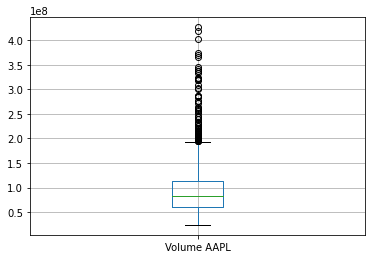

In [667]:
# checking for outliers by column

stocks.boxplot(column= ['Volume AAPL'])
mplt.show()

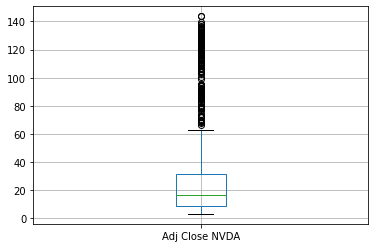

In [668]:
stocks.boxplot(column= ['Adj Close NVDA'])
mplt.show()

In [669]:
outliers

,Date,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,Adj Close GOOGL,Close GOOGL,High GOOGL,...,High TSLA,Low TSLA,Open TSLA,Volume TSLA,Adj Close NVDA,Close NVDA,High NVDA,Low NVDA,Open NVDA,Volume NVDA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,139.559998,139.559998,142.429993,137.460007,142.029999,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,143.589996,143.589996,144.419998,141.779999,142.910004,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,143.710007,143.710007,143.710007,138.000000,138.130005,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,138.000000,138.000000,138.899994,137.279999,138.669998,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,136.929993,136.929993,140.889999,136.869995,139.339996,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,219111200.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,234428400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,365248800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


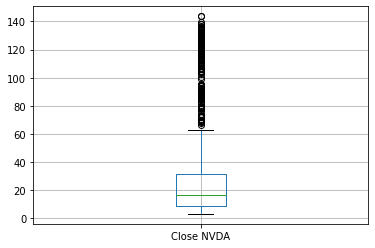

In [670]:
stocks.boxplot(column= ['Close NVDA'])
mplt.show()

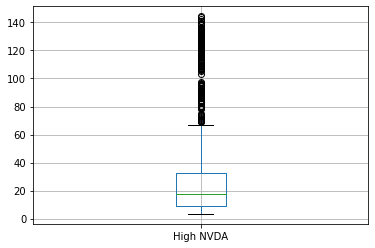

In [671]:
stocks.boxplot(column= ['High NVDA'])
mplt.show()

In [672]:
outliers

,Date,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,Adj Close GOOGL,Close GOOGL,High GOOGL,...,High TSLA,Low TSLA,Open TSLA,Volume TSLA,Adj Close NVDA,Close NVDA,High NVDA,Low NVDA,Open NVDA,Volume NVDA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,139.559998,139.559998,142.429993,137.460007,142.029999,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,143.589996,143.589996,144.419998,141.779999,142.910004,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,143.710007,143.710007,143.710007,138.000000,138.130005,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,138.000000,138.000000,138.899994,137.279999,138.669998,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,136.929993,136.929993,140.889999,136.869995,139.339996,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,219111200.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,234428400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN,NaN,NaN,365248800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


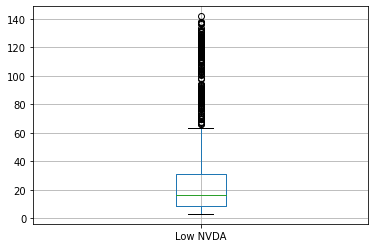

In [673]:
stocks.boxplot(column= ['Low NVDA'])
mplt.show()

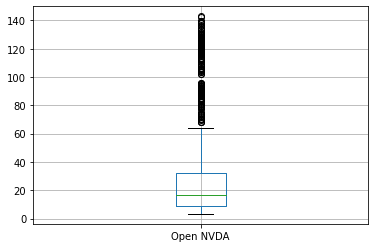

In [674]:
stocks.boxplot(column= ['Open NVDA'])
mplt.show()

# Identify Outliers in the by Column. Six columns in total

# interquartile range (IQR) method for finding the outliers in Volume AAPL

In [675]:
# Firstly calculating the the quartiles (Q1 and Q3)
Q1 = stocks['Volume AAPL'].quantile(0.25)
Q3 = stocks['Volume AAPL'].quantile(0.75)

In [676]:
print(Q1, Q3)


60804200.0 113594800.0


In [677]:
# Caculated the IQR following the statistical emthod
IQR = Q3 - Q1
IQR

52790600.0

In [678]:
# Calculating the upper and lower limit named l_limit, u_limit
l_limit = Q1 - 1.5*IQR
u_limit = Q3 - 1.5*IQR

l_limit, u_limit

(-18381700.0, 34408900.0)

In [679]:
# Then used the outliers formula to find the outliers for the column and and then printed it 


In [680]:
outliers = stocks[(stocks['Volume AAPL'] < Q1 - 1.5 * IQR) | (stocks['Volume AAPL'] > Q3 + 1.5 * IQR)]


In [681]:
outlier_column = outliers[['Volume AAPL']]
outlier_column

,Volume AAPL
23,318679900
86,246421400
92,198134300
715,195432700
1013,262330500
...,...
1408,204136800
1443,244439200
1459,219111200
1460,234428400


In [682]:
# Then used IPython display to display the crazy outliers
from IPython.display import display


In [683]:
# I Identify the crazy outliers in the data set
crazy_outliers = stocks['Volume AAPL'][(np.abs(zscore(stocks['Volume AAPL'])) > 3) & (stocks['Volume AAPL'] < Q1 - 3 * IQR) | (stocks['Volume AAPL'] > Q3 + 3 * IQR)]

In [684]:
# Displaying the crazy outliers
display(crazy_outliers)


23      318679900
1030    287104900
1039    332607200
1048    345937600
1049    338054800
1063    308151200
1064    374336800
1153    303602000
1154    287531200
1155    336752800
1156    401693200
1158    300233600
1159    324056000
1160    322423600
1161    370732000
1162    418474000
1164    285290000
1165    286744800
1169    319475600
1170    341397200
1171    426510000
1172    320605600
1217    275978000
1317    277125600
1461    365248800
Name: Volume AAPL, dtype: int64

# interquartile range (IQR) method for finding the outliers in Adj Close NVDA

In [685]:
# Firstly calculating the the quartiles (Q1 and Q3)
Q1 = stocks['Adj Close NVDA'].quantile(0.25)
Q3 = stocks['Adj Close NVDA'].quantile(0.75)

In [686]:
print(Q1, Q3)


9.136370659 31.641622545


In [687]:
IQR = Q3 - Q1
IQR

22.505251886

In [688]:
# Calculating the upper and lower limit named l_limit, u_limit
l_limit = Q1 - 1.5*IQR
u_limit = Q3 - 1.5*IQR

l_limit, u_limit

(-24.62150717, -2.116255284000001)

In [689]:
# Then used the outliers formula to find the outliers for the column and and then printed it 

outliers = stocks[(stocks['Adj Close NVDA'] < Q1 - 1.5 * IQR) | (stocks['Adj Close NVDA'] > Q3 + 1.5 * IQR)]


In [690]:
outlier_column = outliers['Adj Close NVDA']
outlier_column


0      139.559998
1      143.589996
2      143.710007
3      138.000000
4      136.929993
          ...    
178     69.626053
179     70.083954
180     68.208366
181     69.317131
182     66.145805
Name: Adj Close NVDA, Length: 183, dtype: float64

In [691]:
# Then used IPython display to display the crazy outliers
from IPython.display import display


In [692]:
# I Identify the crazy outliers in the data set
crazy_outliers = stocks['Adj Close NVDA'][(np.abs(zscore(stocks['Adj Close NVDA'])) > 3) & (stocks['Adj Close NVDA'] < Q1 - 3 * IQR) | (stocks['Adj Close NVDA'] > Q3 + 3 * IQR)]
# Displaying the crazy outliers
display(crazy_outliers)

0      139.559998
1      143.589996
2      143.710007
3      138.000000
4      136.929993
          ...    
101    110.481476
102    114.805748
103    113.881905
104    106.451149
105    103.781601
Name: Adj Close NVDA, Length: 105, dtype: float64

# interquartile range (IQR) method for finding the outliers in Close NVDA

In [693]:
# Firstly calculating the the quartiles (Q1 and Q3)
Q1 = stocks['Close NVDA'].quantile(0.25)
Q3 = stocks['Close NVDA'].quantile(0.75)

print(Q1, Q3)

9.1643748285 31.67649937


In [694]:
# Caculated the IQR following the statistical emthod
IQR = Q3 - Q1
IQR

22.5121245415

In [695]:
# Calculating the upper and lower limit named l_limit, u_limit
l_limit = Q1 - 1.5*IQR
u_limit = Q3 - 1.5*IQR

l_limit, u_limit

(-24.60381198375, -2.0916874422500022)

In [696]:
# Then used the outliers formula to find the outliers for the column and and then printed it 
outliers = stocks[(stocks['Close NVDA'] < Q1 - 1.5 * IQR) | (stocks['Close NVDA'] > Q3 + 1.5 * IQR)]

In [697]:

outlier_column = outliers['Close NVDA']
outlier_column

0      139.559998
1      143.589996
2      143.710007
3      138.000000
4      136.929993
          ...    
178     69.640999
179     70.098999
180     68.223000
181     69.332001
182     66.160004
Name: Close NVDA, Length: 183, dtype: float64

In [698]:
# Then used IPython display to display the crazy outliers
from IPython.display import display


In [699]:
# I Identify the crazy outliers in the data set
crazy_outliers = stocks['Close NVDA'][(np.abs(zscore(stocks['Close NVDA'])) > 3) & (stocks['Close NVDA'] < Q1 - 3 * IQR) | (stocks['Close NVDA'] > Q3 + 3 * IQR)]
# Displaying the crazy outliers
display(crazy_outliers)

0      139.559998
1      143.589996
2      143.710007
3      138.000000
4      136.929993
          ...    
101    110.500000
102    114.824997
103    113.901001
104    106.469002
105    103.799004
Name: Close NVDA, Length: 105, dtype: float64

# interquartile range (IQR) method for finding the outliers in Low NVDA

In [700]:
# Firstly calculating the the quartiles (Q1 and Q3)
Q1 = stocks['Low NVDA'].quantile(0.25)
Q3 = stocks['Low NVDA'].quantile(0.75)

print(Q1, Q3)

8.8943748475 30.921999935


In [701]:
# Caculated the IQR following the statistical emthod
IQR = Q3 - Q1
IQR

22.0276250875

In [702]:
# Calculating the upper and lower limit named l_limit, u_limit
l_limit = Q1 - 1.5*IQR
u_limit = Q3 - 1.5*IQR

l_limit, u_limit

(-24.14706278375, -2.1194376962499994)

In [703]:
# Then used the outliers formula to find the outliers for the column and and then printed it 

outliers = stocks[(stocks['Low NVDA'] < Q1 - 1.5 * IQR) | (stocks['Low NVDA'] > Q3 + 1.5 * IQR)]

In [704]:
outlier_column = outliers[['Low NVDA']]
outlier_column

,Low NVDA
0,137.460007
1,141.779999
2,138.000000
3,137.279999
4,136.869995
...,...
177,70.211998
178,69.455002
179,67.599998
180,66.300003


In [705]:
# Then used IPython display to display the crazy outliers
from IPython.display import display


In [706]:
# I Identify the crazy outliers in the data set
crazy_outliers = stocks['Low NVDA'][np.abs(zscore((stocks['Low NVDA'])) > 3) & (stocks['Low NVDA'] < Q1 - 3 * IQR) | (stocks['Low NVDA'] > Q3 + 3 * IQR)]

# Displaying the crazy outliers
display(crazy_outliers)

0      137.460007
1      141.779999
2      138.000000
3      137.279999
4      136.869995
          ...    
101    109.663002
102    110.901001
103    109.883003
104    103.000000
105    101.519997
Name: Low NVDA, Length: 105, dtype: float64

# interquartile range (IQR) method for finding the outliers in High NVDA

In [707]:
# Firstly calculating the the quartiles (Q1 and Q3)
Q1 = stocks['High NVDA'].quantile(0.25)
Q3 = stocks['High NVDA'].quantile(0.75)

print(Q1, Q3)

9.263999939 32.40450096


In [708]:
# Caculated the IQR following the statistical emthod
IQR = Q3 - Q1
IQR

23.140501021

In [709]:
# Calculating the upper and lower limit named l_limit, u_limit
l_limit = Q1 - 1.5*IQR
u_limit = Q3 - 1.5*IQR

l_limit, u_limit

(-25.446751592499993, -2.3062505714999944)

In [710]:
# Then used the outliers formula to find the outliers for the column and and then printed it 

outliers = stocks[(stocks['High NVDA'] < Q1 - 1.5 * IQR) | (stocks['High NVDA'] > Q3 + 1.5 * IQR)]

outlier_column = stocks[['High NVDA']]
outlier_column

,High NVDA
0,142.429993
1,144.419998
2,143.710007
3,138.899994
4,140.889999
...,...
1458,3.669500
1459,3.622250
1460,3.443250
1461,3.379000


In [711]:
# Then used IPython display to display the crazy outliers
from IPython.display import display


In [712]:
# I Identify the crazy outliers in the data set
crazy_outliers = stocks['High NVDA'][(np.abs(zscore(stocks['High NVDA'])) > 3) & (stocks['High NVDA'] < Q1 - 3 * IQR) | (stocks['High NVDA'] > Q3 + 3 * IQR)]

# Displaying the crazy outliers
display(crazy_outliers)

0      142.429993
1      144.419998
2      143.710007
3      138.899994
4      140.889999
          ...    
101    115.819000
102    115.491997
103    114.939003
104    106.474998
105    106.320000
Name: High NVDA, Length: 106, dtype: float64

=== Stock Price Outlier Analysis ===

Basic Statistics:
Mean: $29.89
Standard Deviation: $32.93
Min: $3.38
Max: $144.42

Quartile Analysis:
Q1: $9.26
Q3: $32.40
IQR: $23.14

Outlier Boundaries:
Lower bound: $-25.45
Upper bound: $67.12

Number of Outliers: 182

Outlier Values:


0      142.429993
1      144.419998
2      143.710007
3      138.899994
4      140.889999
          ...    
177     72.184998
178     70.793999
179     70.220001
180     69.753998
181     69.497002
Name: High NVDA, Length: 182, dtype: float64


Number of Extreme Outliers: 9

Extreme Outlier Values:


0     142.429993
1     144.419998
2     143.710007
3     138.899994
4     140.889999
5     136.619995
6     138.570007
7     139.600006
87    140.759995
Name: High NVDA, dtype: float64

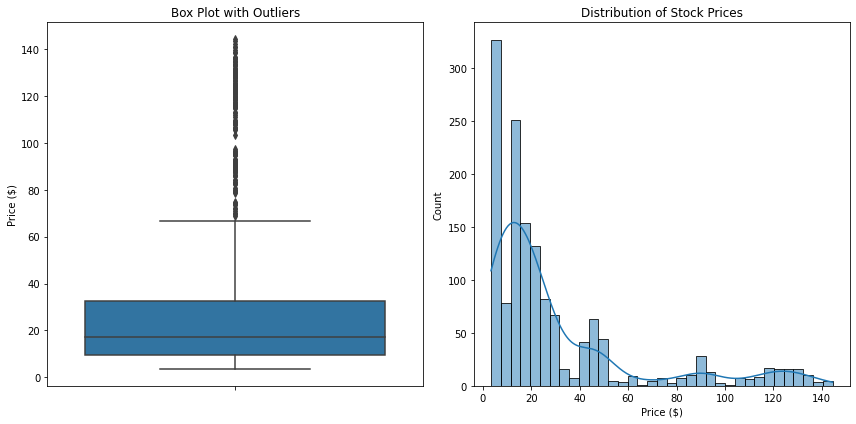

In [713]:
import numpy as np
from scipy.stats import zscore
from IPython.display import display

def detect_stock_outliers(df, column_name='High NVDA', iqr_threshold=1.5, zscore_threshold=3):
    """
    Detect outliers in stock price data
    
    Parameters:
    df: DataFrame containing stock data
    column_name: str - column to analyze (default 'High NVDA')
    iqr_threshold: float - multiplier for IQR
    zscore_threshold: float - threshold for z-score
    
    Returns:
    Dictionary containing outlier information
    """
    # Calculate quartiles and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    
    # Find regular outliers (IQR method)
    outliers = df[(df[column_name] < lower_bound) | 
                  (df[column_name] > upper_bound)][column_name]
    
    # Find extreme outliers (z-score method)
    z_scores = np.abs(zscore(df[column_name]))
    extreme_outliers = df[column_name][(z_scores > zscore_threshold) & 
                                     ((df[column_name] < Q1 - iqr_threshold * 3 * IQR) | 
                                      (df[column_name] > Q3 + iqr_threshold * 3 * IQR))]
    
    results = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers,
        'extreme_outliers': extreme_outliers,
        'summary_stats': {
            'mean': df[column_name].mean(),
            'std': df[column_name].std(),
            'min': df[column_name].min(),
            'max': df[column_name].max()
        }
    }
    
    return results

def print_stock_outlier_results(results):
    """
    Print formatted results of stock outlier analysis
    """
    print("=== Stock Price Outlier Analysis ===")
    print(f"\nBasic Statistics:")
    print(f"Mean: ${results['summary_stats']['mean']:.2f}")
    print(f"Standard Deviation: ${results['summary_stats']['std']:.2f}")
    print(f"Min: ${results['summary_stats']['min']:.2f}")
    print(f"Max: ${results['summary_stats']['max']:.2f}")
    
    print(f"\nQuartile Analysis:")
    print(f"Q1: ${results['Q1']:.2f}")
    print(f"Q3: ${results['Q3']:.2f}")
    print(f"IQR: ${results['IQR']:.2f}")
    
    print(f"\nOutlier Boundaries:")
    print(f"Lower bound: ${results['lower_bound']:.2f}")
    print(f"Upper bound: ${results['upper_bound']:.2f}")
    
    print(f"\nNumber of Outliers: {len(results['outliers'])}")
    print("\nOutlier Values:")
    display(results['outliers'])
    
    print(f"\nNumber of Extreme Outliers: {len(results['extreme_outliers'])}")
    print("\nExtreme Outlier Values:")
    display(results['extreme_outliers'])

# Run the analysis
# Assuming your DataFrame is called 'stocks'
result = detect_stock_outliers(stocks)
print_stock_outlier_results(result)

# Optional: Create a visualization
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stock_outliers(df, column_name='High NVDA', results=None):
    plt.figure(figsize=(12, 6))
    
    # Create box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column_name])
    plt.title('Box Plot with Outliers')
    plt.ylabel('Price ($)')
    
    # Create histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df[column_name], kde=True)
    plt.title('Distribution of Stock Prices')
    plt.xlabel('Price ($)')
    
    plt.tight_layout()
    plt.show()

# Create the visualization
plot_stock_outliers(stocks, results=result)

# interquartile range (IQR) method for finding the outliers in Volume NVDA

In [714]:
# Firstly calculating the the quartiles (Q1 and Q3)
Q1 = stocks['Volume NVDA'].quantile(0.25)
Q3 = stocks['Volume NVDA'].quantile(0.75)

print(Q1, Q3)


321087750.0 551506000.0


In [715]:
# Caculated the IQR following the statistical emthod
IQR = Q3 - Q1
IQR

230418250.0

In [716]:
# Calculating the upper and lower limit named l_limit, u_limit
l_limit = Q1 - 1.5*IQR
u_limit = Q3 - 1.5*IQR

l_limit, u_limit

(-24539625.0, 205878625.0)

In [717]:
# Then used the outliers formula to find the outliers for the column and and then printed it 

outliers = stocks[(stocks['Volume NVDA'] < Q1 - 1.5 * IQR) | (stocks['Volume NVDA'] > Q3 + 1.5 * IQR)]

outlier_column = outliers[['Volume NVDA']]
outlier_column

,Volume NVDA
158,1142269000
230,899420000
292,925341000
293,1156044000
317,963769000
352,1002580000
353,923401000
355,1543911000
419,1117995000
538,1178865000


In [718]:
# Then used IPython display to display the crazy outliers

from IPython.display import display

# I Identify the crazy outliers in the data set
crazy_outliers = stocks['Volume NVDA'][(np.abs(zscore(stocks['Volume NVDA'])) > 3) & (stocks['Volume NVDA'] < Q1 - 3 * IQR) | (stocks['Volume NVDA'] > Q3 + 3 * IQR)]

# Displaying the crazy outliers
display(crazy_outliers)

355     1543911000
1039    1463684000
1431    1516748000
1445    2511528000
Name: Volume NVDA, dtype: int64

# 5.0 Identifying Duplicates in the dataset

In [719]:
stocks.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1458    False
1459    False
1460    False
1461    False
1462    False
Length: 1463, dtype: bool

In [720]:
stocks.duplicated().value_counts()

False    1463
dtype: int64

In [721]:
stocks.duplicated().sum()


0

In [722]:
stocks.duplicated(keep=False)


0       False
1       False
2       False
3       False
4       False
        ...  
1458    False
1459    False
1460    False
1461    False
1462    False
Length: 1463, dtype: bool

In [723]:
stocks.loc[stocks.duplicated(keep=False)]


,Date,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL,Adj Close GOOGL,Close GOOGL,High GOOGL,...,High TSLA,Low TSLA,Open TSLA,Volume TSLA,Adj Close NVDA,Close NVDA,High NVDA,Low NVDA,Open NVDA,Volume NVDA


# 6.0 Identifying unmatched data

- Identifying unmatched or misaligned data in a stocks DataFrame:

=== Data Mismatch Analysis ===

1. Null Values:
Date               0
Adj Close AAPL     0
Close AAPL         0
High AAPL          0
Low AAPL           0
Open AAPL          0
Volume AAPL        0
Adj Close GOOGL    0
Close GOOGL        0
High GOOGL         0
Low GOOGL          0
Open GOOGL         0
Volume GOOGL       0
Adj Close MSFT     0
Close MSFT         0
High MSFT          0
Low MSFT           0
Open MSFT          0
Volume MSFT        0
Adj Close AMZN     0
Close AMZN         0
High AMZN          0
Low AMZN           0
Open AMZN          0
Volume AMZN        0
Adj Close META     0
Close META         0
High META          0
Low META           0
Open META          0
Volume META        0
Adj Close TSLA     0
Close TSLA         0
High TSLA          0
Low TSLA           0
Open TSLA          0
Volume TSLA        0
Adj Close NVDA     0
Close NVDA         0
High NVDA          0
Low NVDA           0
Open NVDA          0
Volume NVDA        0
dtype: int64


2. Price Mismatches:
High-Low viol

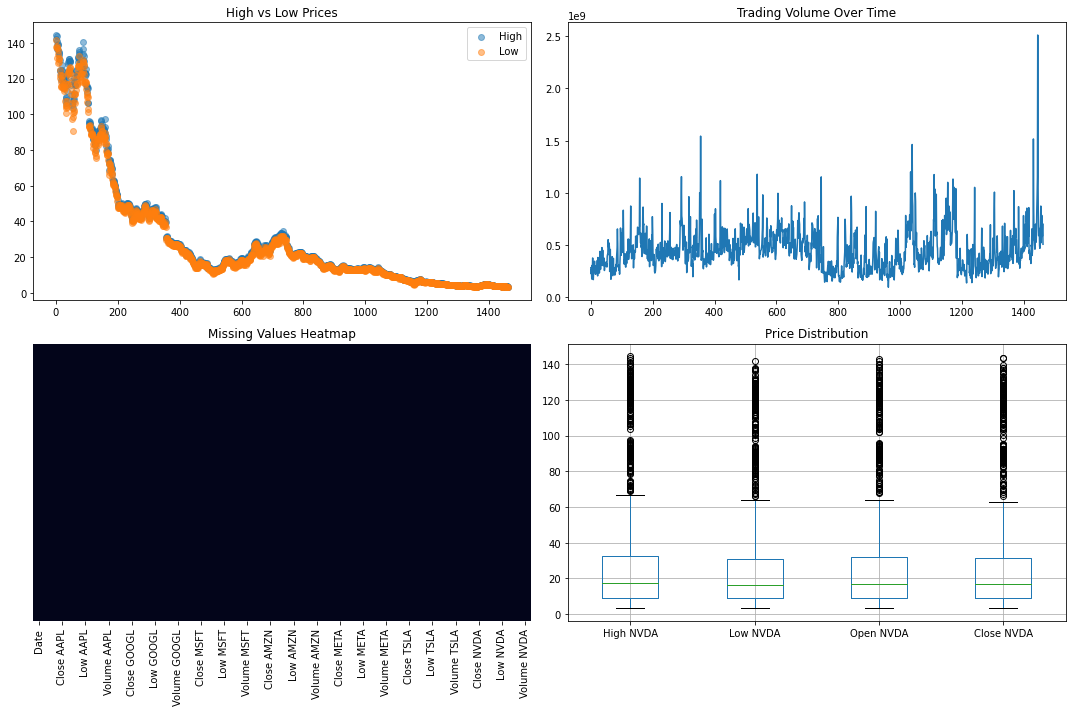

In [724]:
def identify_unmatched_data(df):
    """
    Identify unmatched or misaligned data in stocks DataFrame
    
    Parameters:
    df: DataFrame containing stock data
    
    Returns:
    Dictionary containing various checks and mismatches
    """
    mismatches = {
        'null_values': {},
        'price_mismatches': {},
        'volume_anomalies': {},
        'date_issues': {},
        'logical_violations': {}
    }
    
    # 1. Check for null values
    mismatches['null_values'] = df.isnull().sum()
    
    # 2. Check price relationships (High should be >= Low)
    if 'High NVDA' in df.columns and 'Low NVDA' in df.columns:
        price_mismatch = df[df['High NVDA'] < df['Low NVDA']]
        mismatches['price_mismatches']['high_low_violation'] = price_mismatch
    
    # 3. Check Open-Close relationship
    if 'Open NVDA' in df.columns and 'Close NVDA' in df.columns:
        open_close_mismatch = df[
            (df['High NVDA'] < df['Open NVDA']) | 
            (df['High NVDA'] < df['Close NVDA']) |
            (df['Low NVDA'] > df['Open NVDA']) | 
            (df['Low NVDA'] > df['Close NVDA'])
        ]
        mismatches['price_mismatches']['open_close_violation'] = open_close_mismatch
    
    # 4. Check for volume anomalies
    if 'Volume NVDA' in df.columns:
        volume_zeros = df[df['Volume NVDA'] == 0]
        volume_outliers = df[df['Volume NVDA'] > df['Volume NVDA'].mean() + 3*df['Volume NVDA'].std()]
        mismatches['volume_anomalies'] = {
            'zero_volume': volume_zeros,
            'volume_outliers': volume_outliers
        }
    
    # 5. Check date continuity
    if df.index.dtype == 'datetime64[ns]':
        date_gaps = []
        dates = df.index.sort_values()
        for i in range(1, len(dates)):
            if (dates[i] - dates[i-1]).days > 1:
                date_gaps.append((dates[i-1], dates[i]))
        mismatches['date_issues']['gaps'] = date_gaps
        
        # Check for duplicated dates
        duplicated_dates = df.index.duplicated()
        mismatches['date_issues']['duplicates'] = df[duplicated_dates]
    
    return mismatches

def print_mismatch_results(mismatches):
    """
    Print formatted results of mismatch analysis
    """
    print("=== Data Mismatch Analysis ===\n")
    
    # Print null values
    print("1. Null Values:")
    print(mismatches['null_values'])
    print("\n")
    
    # Print price mismatches
    print("2. Price Mismatches:")
    if 'high_low_violation' in mismatches['price_mismatches']:
        print(f"High-Low violations found: {len(mismatches['price_mismatches']['high_low_violation'])} instances")
    if 'open_close_violation' in mismatches['price_mismatches']:
        print(f"Open-Close violations found: {len(mismatches['price_mismatches']['open_close_violation'])} instances")
    print("\n")
    
    # Print volume anomalies
    print("3. Volume Anomalies:")
    if 'volume_anomalies' in mismatches:
        print(f"Zero volume instances: {len(mismatches['volume_anomalies']['zero_volume'])}")
        print(f"Volume outliers: {len(mismatches['volume_anomalies']['volume_outliers'])}")
    print("\n")
    
    # Print date issues
    print("4. Date Issues:")
    if 'gaps' in mismatches['date_issues']:
        print(f"Date gaps found: {len(mismatches['date_issues']['gaps'])}")
        if len(mismatches['date_issues']['gaps']) > 0:
            print("Sample gaps:")
            for gap in mismatches['date_issues']['gaps'][:5]:
                print(f"Gap between {gap[0]} and {gap[1]}")
    if 'duplicates' in mismatches['date_issues']:
        print(f"Duplicated dates found: {len(mismatches['date_issues']['duplicates'])}")

# Example usage
# Run the analysis
results = identify_unmatched_data(stocks)
print_mismatch_results(results)

# Optional: Visualize the mismatches
def plot_mismatches(df, results):
    """
    Create visualizations for identified mismatches
    """
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Price relationships
    plt.subplot(2, 2, 1)
    plt.scatter(df.index, df['High NVDA'], alpha=0.5, label='High')
    plt.scatter(df.index, df['Low NVDA'], alpha=0.5, label='Low')
    plt.title('High vs Low Prices')
    plt.legend()
    
    # Plot 2: Volume
    plt.subplot(2, 2, 2)
    plt.plot(df.index, df['Volume NVDA'])
    plt.title('Trading Volume Over Time')
    
    # Plot 3: Missing values heatmap
    plt.subplot(2, 2, 3)
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
    plt.title('Missing Values Heatmap')
    
    # Plot 4: Price range box plot
    plt.subplot(2, 2, 4)
    df.boxplot(column=['High NVDA', 'Low NVDA', 'Open NVDA', 'Close NVDA'])
    plt.title('Price Distribution')
    
    plt.tight_layout()
    plt.show()

# Create the visualization
plot_mismatches(stocks, results)

In [725]:
'''
This code checks for several types of mismatches:

Null Values:

Identifies missing data in any column
Price Mismatches:

High price less than Low price
Open/Close prices outside High-Low range
Illogical price relationships
Volume Anomalies:

Zero volume trading days
Unusual volume spikes
Date Issues:

Gaps in trading days
Duplicate dates
Non-continuous data
Visualization:

Shows price relationships
Displays volume patterns
Highlights missing data
Shows price distributions
'''

'\nThis code checks for several types of mismatches:\n\nNull Values:\n\nIdentifies missing data in any column\nPrice Mismatches:\n\nHigh price less than Low price\nOpen/Close prices outside High-Low range\nIllogical price relationships\nVolume Anomalies:\n\nZero volume trading days\nUnusual volume spikes\nDate Issues:\n\nGaps in trading days\nDuplicate dates\nNon-continuous data\nVisualization:\n\nShows price relationships\nDisplays volume patterns\nHighlights missing data\nShows price distributions\n'

- To handle identified mismatches

In [728]:
def clean_mismatches(df, results):
    """
    Clean identified mismatches based on results
    """
    df_clean = df.copy()
    
    # Handle null values
    df_clean = df_clean.dropna()
    
    # Handle price mismatches
    if 'high_low_violation' in results['price_mismatches']:
        df_clean = df_clean.drop(results['price_mismatches']['high_low_violation'].index)
    
    # Handle volume anomalies
    if 'volume_anomalies' in results:
        df_clean = df_clean[df_clean['Volume NVDA'] > 0]
    
    return df_clean

# Clean the data
clean_stocks = clean_mismatches(stocks, results)

print(clean_stocks)

            Date  Adj Close AAPL  Close AAPL   High AAPL    Low AAPL  \
0     23/10/2024      230.759995  230.759995  235.139999  227.759995   
1     22/10/2024      235.860001  235.860001  236.220001  232.600006   
2     21/10/2024      236.479996  236.479996  236.850006  234.449997   
3     18/10/2024      235.000000  235.000000  236.179993  234.009995   
4     17/10/2024      232.149994  232.149994  233.850006  230.520004   
...          ...             ...         ...         ...         ...   
1458  08/01/2019       36.036121   37.687500   37.955002   37.130001   
1459  07/01/2019       35.362007   36.982498   37.207500   36.474998   
1460  04/01/2019       35.440903   37.064999   37.137501   35.950001   
1461  03/01/2019       33.989891   35.547501   36.430000   35.500000   
1462  02/01/2019       37.750080   39.480000   39.712502   38.557499   

       Open AAPL  Volume AAPL  Adj Close GOOGL  Close GOOGL  High GOOGL  ...  \
0     234.080002     52037200       162.779999   162.77

# END